In [2]:
import pandas as pd

import numpy as np
import os
import sys
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import fbeta_score, make_scorer
import time
from sklearn import model_selection

In [61]:
df = pd.read_csv('data.v2.2.csv')

In [63]:
leakage = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
        'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

In [64]:
df.drop(columns=leakage, axis=1, inplace=True)

In [65]:
def generateTrainAndTest(total):
    train,test = model_selection.train_test_split(total, train_size = 0.8, test_size = 0.2)
    X_train = train.drop(columns=["CONTRIBUTING FACTOR VEHICLE 1"])
    y_train = train['CONTRIBUTING FACTOR VEHICLE 1']
    X_test = test.drop(columns=["CONTRIBUTING FACTOR VEHICLE 1"])
    y_test = test['CONTRIBUTING FACTOR VEHICLE 1']
    return X_train,X_test,y_train,y_test


In [66]:
# Train F1 Score
def Grid_f1_fit(X_train,X_test,y_train,y_test, classifier):
    parameters = {'n_estimators':[15,17,20,25,30], 
                  'max_depth':[7,10, 20, 30, 40, 50, None],
                  'min_samples_split':[2,4,7,10],
                  'min_samples_leaf':[8,10,12],
                  'max_features':["auto"]
                  }
    
    GridSearch = GridSearchCV(classifier, parameters, scoring=make_scorer(fbeta_score, beta=1),
                              n_jobs=-1, error_score=0, verbose=1,
                              return_train_score=True)

    time1 = time.time()
    GridSearch.fit(X_train,y_train)
    time2 = time.time()
    clf = GridSearch.best_estimator_
    
    
    print("Grid search takes %.2f seconds" % (time2-time1))
    print("Grid search best params setting", GridSearch.best_params_)
    print("-------------If using 10% scores to predict------------------")
    print("precison:",precision_score(y_test, get_top10_prediction(clf , X_test)))
    print("recall:",recall_score(y_test,get_top10_prediction(clf , X_test)))
    print("fbeta score (beta=1):",fbeta_score(y_test,get_top10_prediction(clf, X_test),beta=1))

    print("-----------If using the default predict---------------")
    print("precison:",precision_score(y_test,clf.predict(X_test)))
    print("recall:",recall_score(y_test,clf.predict(X_test)))
    print("fbeta score (beta=1):",fbeta_score(y_test,clf.predict(X_test),beta=1))

    return GridSearch


In [67]:
X_train,X_test,y_train,y_test = generateTrainAndTest(df)
classifier = ensemble.RandomForestClassifier()


In [68]:
parameters = {'n_estimators':[21,30,40,50, 60, 100], 
                  'max_depth':[7,10, 20, 30, 40, 50, None],
                  'min_samples_split':[2,4,7,10, 20, 30],
                  'min_samples_leaf':[8,10,12, 20, 25],
                  'max_features':["auto"]
                  }
    
GridSearch = GridSearchCV(classifier, parameters, 
                              n_jobs=-1, error_score=0, verbose=1,
                              return_train_score=True)

In [69]:
GridSearch.fit(X_train, y_train)

Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 3780 out of 3780 | elapsed: 44.6min finished


GridSearchCV(cv=None, error_score=0,
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [21, 30, 40, 50, 60, 100], 'max_depth': [7, 10, 20, 30, 40, 50, None], 'min_samples_split': [2, 4, 7, 10, 20, 30], 'min_samples_leaf': [8, 10, 12, 20, 25], 'max_features': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [70]:
clf = GridSearch.best_estimator_
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
true = np.expand_dims(list(y_test), axis=1)
true

array([[3],
       [1],
       [0],
       ...,
       [1],
       [2],
       [2]])

In [87]:
la = clf.predict(X_test)
la

array([0, 1, 1, ..., 0, 0, 1])

In [88]:
la_pro = clf.predict_proba(X_test)
la_pro

array([[0.33546784, 0.25337779, 0.10127651, 0.30987786],
       [0.34835681, 0.35519508, 0.13051914, 0.16592897],
       [0.27457249, 0.34502877, 0.12277404, 0.2576247 ],
       ...,
       [0.41894439, 0.38701254, 0.08160813, 0.11243494],
       [0.57735833, 0.25138423, 0.13681032, 0.03444713],
       [0.12676623, 0.42363131, 0.06449602, 0.38510644]])

In [93]:
la_pro.shape

(12703, 4)

In [110]:
np.expand_dims(la, axis=1)

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [95]:
la1 = np.expand_dims(la, axis=1)
la1

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [101]:
d1 = np.append(la_pro,la1, axis = 1)
d1

array([[0.33546784, 0.25337779, 0.10127651, 0.30987786, 0.        ],
       [0.34835681, 0.35519508, 0.13051914, 0.16592897, 1.        ],
       [0.27457249, 0.34502877, 0.12277404, 0.2576247 , 1.        ],
       ...,
       [0.41894439, 0.38701254, 0.08160813, 0.11243494, 0.        ],
       [0.57735833, 0.25138423, 0.13681032, 0.03444713, 0.        ],
       [0.12676623, 0.42363131, 0.06449602, 0.38510644, 1.        ]])

In [102]:
d2 = np.append(d1, true, axis = 1)
d2

array([[0.33546784, 0.25337779, 0.10127651, 0.30987786, 0.        ,
        3.        ],
       [0.34835681, 0.35519508, 0.13051914, 0.16592897, 1.        ,
        1.        ],
       [0.27457249, 0.34502877, 0.12277404, 0.2576247 , 1.        ,
        0.        ],
       ...,
       [0.41894439, 0.38701254, 0.08160813, 0.11243494, 0.        ,
        1.        ],
       [0.57735833, 0.25138423, 0.13681032, 0.03444713, 0.        ,
        2.        ],
       [0.12676623, 0.42363131, 0.06449602, 0.38510644, 1.        ,
        2.        ]])

In [72]:
label = {0: 'Failure to Yield Right-of-Way',
 1: 'Following Too Closely',
 2: 'Turning Improperly',
 3: 'Unsafe Lane Changing'}

In [103]:
lab = list(label.values())
lab.extend(['predicted label', 'true label'])

In [104]:
lab

['Failure to Yield Right-of-Way',
 'Following Too Closely',
 'Turning Improperly',
 'Unsafe Lane Changing',
 'predicted label',
 'true label']

In [106]:
df2 = pd.DataFrame(d2, columns=lab)
df2[:10]

,Failure to Yield Right-of-Way,Following Too Closely,Turning Improperly,Unsafe Lane Changing,predicted label,true label
0,0.335468,0.253378,0.101277,0.309878,0.0,3.0
1,0.348357,0.355195,0.130519,0.165929,1.0,1.0
2,0.274572,0.345029,0.122774,0.257625,1.0,0.0
3,0.271400,0.437490,0.143699,0.147411,1.0,3.0
4,0.386627,0.386758,0.127692,0.098924,1.0,2.0
5,0.473131,0.308005,0.111617,0.107247,0.0,1.0
6,0.157337,0.519570,0.100757,0.222337,1.0,3.0
7,0.502617,0.309414,0.110416,0.077552,0.0,0.0
8,0.150262,0.402958,0.138912,0.307868,1.0,1.0
9,0.243374,0.546701,0.051887,0.158037,1.0,1.0


In [111]:
lab1 = list(label.values())

In [115]:
np.array(list(y_test))

array([3, 1, 0, ..., 1, 2, 2])

In [112]:
df3 = pd.DataFrame(la_pro,columns=lab1)

In [113]:
df3['predicted_label'] = la

In [116]:
df3['true_label'] = np.array(list(y_test))

In [120]:
df3[0:10]

,Failure to Yield Right-of-Way,Following Too Closely,Turning Improperly,Unsafe Lane Changing,predicted_label,true_label
0,0.335468,0.253378,0.101277,0.309878,0,3
1,0.348357,0.355195,0.130519,0.165929,1,1
2,0.274572,0.345029,0.122774,0.257625,1,0
3,0.271400,0.437490,0.143699,0.147411,1,3
4,0.386627,0.386758,0.127692,0.098924,1,2
5,0.473131,0.308005,0.111617,0.107247,0,1
6,0.157337,0.519570,0.100757,0.222337,1,3
7,0.502617,0.309414,0.110416,0.077552,0,0
8,0.150262,0.402958,0.138912,0.307868,1,1
9,0.243374,0.546701,0.051887,0.158037,1,1


In [74]:
importance = clf.feature_importances_
importance

array([6.64819080e-02, 6.41824718e-02, 3.16075337e-02, 3.09625741e-02,
       3.10175968e-02, 3.19493636e-02, 3.14757609e-02, 3.42572278e-02,
       2.90323447e-02, 3.20108991e-02, 2.46295390e-02, 5.58736612e-03,
       3.26685364e-02, 3.23742080e-02, 1.54906554e-02, 6.29009210e-03,
       4.28452333e-03, 5.14094250e-03, 4.29856924e-03, 4.61305336e-03,
       5.59172538e-03, 5.38388406e-03, 4.61738849e-03, 4.61125533e-03,
       4.26712374e-03, 4.85198151e-03, 4.22165903e-03, 4.17163450e-03,
       3.44893920e-03, 4.16765312e-03, 4.22909276e-03, 4.69213387e-03,
       5.26508999e-03, 5.57701120e-03, 6.95892213e-03, 4.17223622e-03,
       4.89217083e-03, 5.69119219e-03, 4.49603649e-03, 4.46138636e-03,
       3.74070936e-03, 5.12640833e-03, 4.70099342e-03, 6.78017528e-03,
       3.62965409e-03, 5.44554165e-03, 4.48107353e-03, 4.89164305e-03,
       4.42813320e-03, 3.95431165e-03, 3.69609149e-03, 4.54643550e-03,
       4.70443758e-03, 4.42050029e-03, 5.68439077e-03, 5.26920374e-03,
      

In [75]:
features=list(X_train.columns)
features

['LATITUDE',
 'LONGITUDE',
 'MaxTemperature(° F)',
 'AvgTemperature',
 'MinTemperature',
 'MaxDewPoint(° F)',
 'AvgDewPoint',
 'MinDewPoint',
 'MaxHumidity',
 'MinHumidity',
 'MaxWindSpeed(mph)',
 'MinWindSpeed',
 'MaxPressure(Hg)',
 'MinPressure',
 'Precipation(in)',
 'weeekday',
 'population',
 'population_density',
 'housing_units',
 'occupied_housing_units',
 'median_home_value',
 'median_household_income',
 'age range Under 5',
 'age range 5-9',
 'age range 10-14',
 'age range 15-19',
 'age range 20-24',
 'age range 25-29',
 'age range 30-34',
 'age range 35-39',
 'age range 40-44',
 'age range 45-49',
 'age range 50-54',
 'age range 55-59',
 'age range 60-64',
 'age range 65-69',
 'age range 70-74',
 'age range 75-79',
 'age range 80-84',
 'age range 85 Plus',
 'race_White',
 'race_Black Or African American',
 'race_American Indian Or Alaskan Native',
 'race_Asian',
 'race_Native Hawaiian & Other Pacific Islander',
 'race_Other Race',
 'race_Two Or More Races',
 'gender_Male',
 '

In [76]:
combine = list(zip(features, importance))

In [77]:
sortedImportance = sorted(combine, key = lambda x: -x[1])
sortedImportance

[('LATITUDE', 0.06648190796806033),
 ('LONGITUDE', 0.06418247178972027),
 ('MinDewPoint', 0.03425722779644081),
 ('MaxPressure(Hg)', 0.0326685363741541),
 ('MinPressure', 0.032374208024274174),
 ('MinHumidity', 0.032010899070090956),
 ('MaxDewPoint(° F)', 0.03194936357111794),
 ('MaxTemperature(° F)', 0.031607533678649206),
 ('AvgDewPoint', 0.03147576087715951),
 ('MinTemperature', 0.0310175967824159),
 ('AvgTemperature', 0.030962574127368168),
 ('MaxHumidity', 0.02903234470502545),
 ('MaxWindSpeed(mph)', 0.024629539044280585),
 ('Precipation(in)', 0.015490655386500057),
 ('trans_to_workCar, Truck, Or Van', 0.01201925855079513),
 ('VEHICLE TYPE CODE 1_SPORT UTILITY / STATION WAGON', 0.009513034563575579),
 ('VEHICLE TYPE CODE 1_PASSENGER VEHICLE', 0.008515592178006143),
 ('minute_to_work60-89', 0.008129465480119103),
 ('education_High School Graduate', 0.007579248575933224),
 ('trans_to_workTaxicab', 0.007450354418984709),
 ("education_Associate's Degree", 0.0070033705470454255),
 ('ag

In [78]:
show = sortedImportance[0:35]

In [124]:
plt.rcParams.update({'font.size': 30})

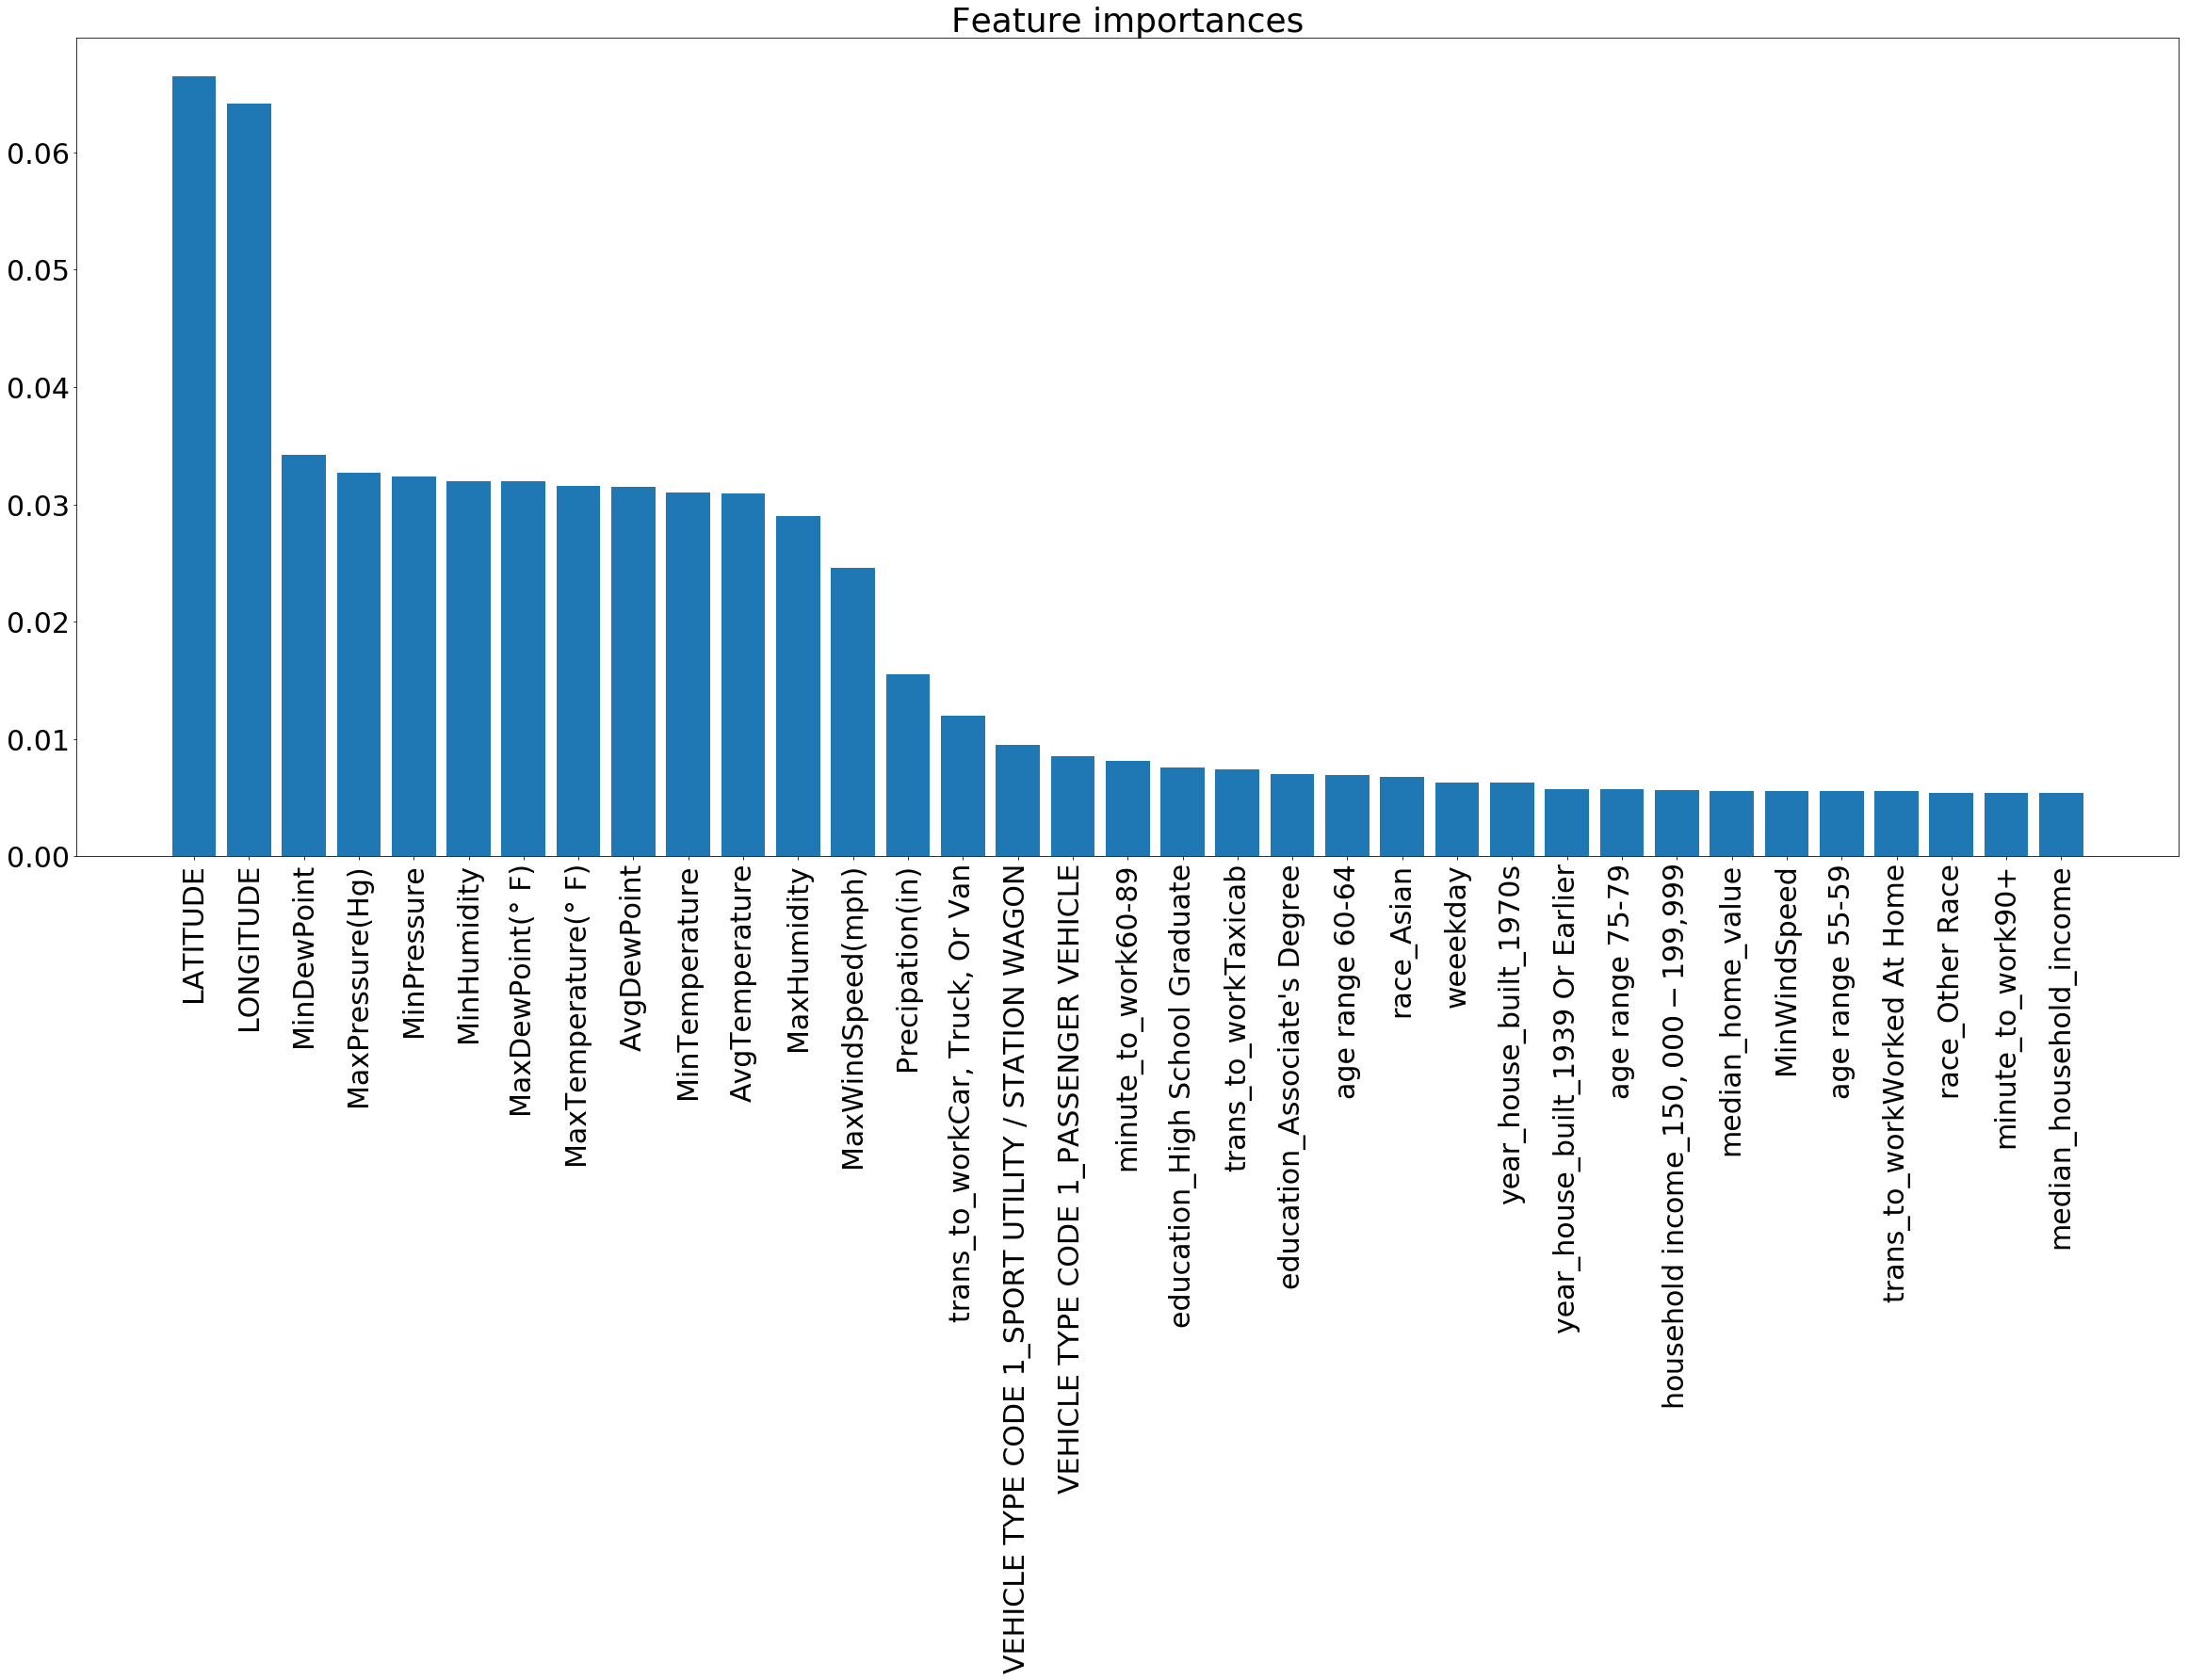

In [125]:

plt.figure(figsize=(40,16))
plt.title("Feature importances")
plt.bar(x=range(len(show)), height=list(map(lambda x:x[1],show)))
plt.xticks(range(len(show)), list(map(lambda x:x[0],show)),rotation=90)
plt.show()

In [46]:
list(map(lambda x:x[1],sortedImportance))

[0.10135072473874622,
 0.05252605271498355,
 0.04681968665368776,
 0.03545340303957005,
 0.02662612601907652,
 0.02475705447581358,
 0.02453236625709227,
 0.024408349714383822,
 0.024246448530196963,
 0.024027740658098682,
 0.023828414371789598,
 0.023340549836575335,
 0.023194369494963462,
 0.02223494726554519,
 0.02174642499931199,
 0.01937535958540295,
 0.010679829327541183,
 0.010662875233056018,
 0.008738037547573898,
 0.00826703953637149,
 0.00817060294997969,
 0.007373796663038004,
 0.007184799518503696,
 0.00709700806553731,
 0.00707766294844576,
 0.006904867045388725,
 0.006780554728294661,
 0.006776254285191019,
 0.006557862966459939,
 0.006544706347430571,
 0.006275153769920083,
 0.0062307419849432465,
 0.006154654757446717,
 0.0060960960418149435,
 0.006006252716454183,
 0.005772090901789323,
 0.0057317804292748575,
 0.005712261284092247,
 0.005703664936643831,
 0.005688674459852859,
 0.005584075260251511,
 0.005559419997409751,
 0.0055298636667931314,
 0.005362706606711758